<img src=https://lstms-brainybits.s3.ap-south-1.amazonaws.com/green+logo.png width="300" height="200" style="float: left; margin-right: 8px;">

We believe in empowering individuals with the
knowledge and skills they need to become lifelong
learners. Our self-learning website offers a diverse
range of high-quality, interactive courses.
**All rights reserved to BrainyBits. Unauthorized reproduction or distribution of this content is prohibited.**

# Support Vector Machine (SVM)

### 1. Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm 
from sklearn.svm import SVC 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

### 2. Data recuperation

In [2]:
dataset = pd.read_csv('sonar data.csv')


In [5]:
dataset.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [10]:
dataset["R"].value_counts()

R
M    111
R     96
Name: count, dtype: int64

### 3.Exploratory Data Analysis

In [3]:
dataset.shape

(207, 61)

In [4]:
dataset.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


### 4.Splitting dataset

In [11]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### 5. Spltting the data into   Train data and Test data

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,stratify = y,random_state = 1)

In [13]:
print(X.shape, X_train.shape, X_test.shape)

(207, 60) (165, 60) (42, 60)


In [14]:
print(X_train)
print(y_train)

[[0.0096 0.0404 0.0682 ... 0.0036 0.0043 0.0018]
 [0.01   0.0275 0.019  ... 0.002  0.0091 0.0058]
 [0.0207 0.0535 0.0334 ... 0.009  0.007  0.0099]
 ...
 [0.0117 0.0069 0.0279 ... 0.0062 0.0026 0.0052]
 [0.115  0.1163 0.0866 ... 0.0141 0.0068 0.0086]
 [0.0187 0.0346 0.0168 ... 0.0115 0.0193 0.0157]]
['M' 'R' 'M' 'R' 'R' 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'M'
 'R' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'M' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'R' 'M'
 'M' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M'
 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'R' 'M' 'R' 'R' 'M' 'R'
 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'R' 'R' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'R' 'M'
 'M' 'M' 'M' 'R' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'R' 'M' 'R' 'M' 'R' 'M'
 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'M' 'M' 'R' 'M' 'M' 'R' 'M' 'R' 'M' 'R' 'R'
 'M' 'R' 'M' 'R' 'M' 'R' 'R' 'M' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'R'
 'R' 'R' 'M' 'R' 'M' 'R' 'M' 'R' 'M' 'M' 'R' 'M' 'M' 'M' 'R' 'M' 'R' 'M'
 'M' 'M' 'M']


### 6. Hyperparameter tuning for a Support Vector Machine model using scikit-learn's GridSearchCV

In [15]:
svm_model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel':['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.01, 0.1, 1, 'scale']
}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

### 7.Train the model

In [16]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

### 8. Best hyperparameters

In [17]:
Best_Hyperparameters = grid_search.best_params_
Best_Hyperparameters

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

### 9.Accuracy of the test data

In [18]:
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9047619047619048


### 10.Confussion Matrix

In [19]:
y_pred = best_model.predict(X_test)
confu_matrix = confusion_matrix(y_pred, y_test)
confu_matrix

array([[22,  3],
       [ 1, 16]])

### 11. Visualising the Confusion Matrix result

Text(95.72222222222221, 0.5, 'Truth')

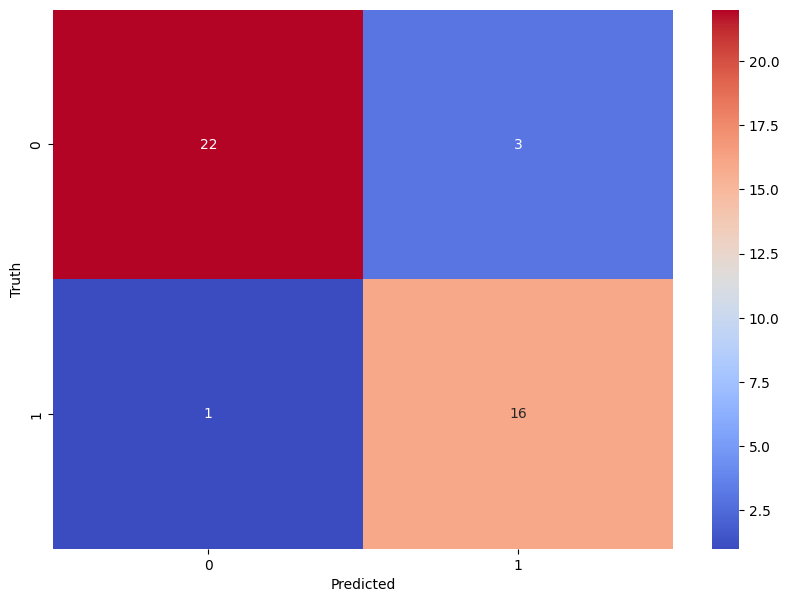

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.heatmap(confu_matrix, annot=True, fmt='d',cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Truth')